In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
%matplotlib inline

In [2]:
# Enable plot theming
import matplotlib.style as style
# print(style.available)

In [3]:
# Set plot theme
style.use('seaborn-deep')

In [17]:
# Read to dataframe
df = pd.read_csv("out.csv")

# Group by monthly income
grouped_income = df.groupby('monthly_income')

# Set order of x-axis
order = ['0 - 3000', '3000 - 6000','6000 - 9000','9000 - 12000', '12000 - 15000','> 15000']

print("Total number of samples:\n{}".format(df.count()))
grouped_income.describe()

Total number of samples:
monthly_income    264
cgpa              264
school            264
dtype: int64


cgpa                                                       
               count      mean       std   min     25%    50%     75%   max
monthly_income                                                             
0 - 3000        31.0  3.521613  0.444343  2.50  3.1600  3.610  3.9000  4.20
12000 - 15000    6.0  3.233333  0.338625  2.80  3.0500  3.250  3.3000  3.80
3000 - 6000     56.0  3.397857  0.348684  2.50  3.1900  3.440  3.6525  4.00
6000 - 9000     53.0  3.241132  0.375657  2.60  2.9700  3.200  3.5500  3.99
9000 - 12000    52.0  3.255192  0.360580  2.40  3.0000  3.300  3.4925  4.00
> 15000         66.0  3.357121  0.444542  2.48  3.0025  3.305  3.7075  4.21

In [18]:
# Group by school
grouped_school = df.groupby('school')
grouped_school.describe()

cgpa                                                   \
                    count      mean       std   min     25%    50%     75%   
school                                                                       
Accountancy          42.0  3.345000  0.387508  2.68  3.0000  3.415  3.6525   
Business             45.0  3.420444  0.335803  2.71  3.2000  3.400  3.6300   
Economics            43.0  3.324419  0.392236  2.40  3.0100  3.360  3.6200   
Information Systems  43.0  3.285814  0.464447  2.50  2.9700  3.220  3.6000   
Law                  47.0  3.272340  0.420570  2.60  2.9350  3.300  3.5750   
Social Sciences      44.0  3.386818  0.393864  2.48  3.1075  3.440  3.6925   

                           
                      max  
school                     
Accountancy          4.00  
Business             4.20  
Economics            4.00  
Information Systems  4.12  
Law                  4.21  
Social Sciences      4.10

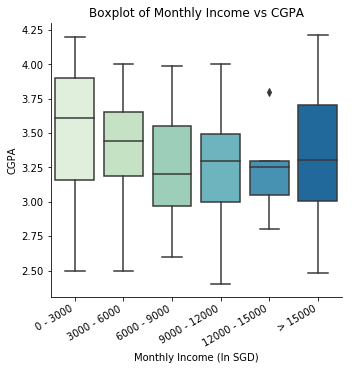

In [19]:
## Visualise
# Box plot
with sns.color_palette("GnBu"):
    box_plot = sns.catplot(
        data=df,
        x="monthly_income", 
        y="cgpa", 
        kind="box", 
        order=order,
    )
    box_plot.set(xlabel='Monthly Income (In SGD)', ylabel='CGPA', title='Boxplot of Monthly Income vs CGPA'
)
    box_plot = box_plot.fig.autofmt_xdate()

In [7]:
## Get statistical values
# ols    => Ordinary Least Squares regression 
# Syntax => ols('dependentVar ~ independentVar')
mod = ols('cgpa ~ monthly_income', data=df).fit()     
print(str(mod.summary()))

with open('Ordinary Least Squares regression.txt', 'w+') as file:
    file.write(str(mod.summary()))

                            OLS Regression Results                            
Dep. Variable:                   cgpa   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.324
Date:                Thu, 08 Nov 2018   Prob (F-statistic):              0.255
Time:                        11:02:21   Log-Likelihood:                -116.22
No. Observations:                 235   AIC:                             244.4
Df Residuals:                     229   BIC:                             265.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [8]:
# ANOVA
aov_table = sm.stats.anova_lm(mod, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
monthly_income,5.0,1.069796,0.213959,1.324374,0.254592
Residual,229.0,36.996078,0.161555,NaN,NaN


C:\Users\--\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


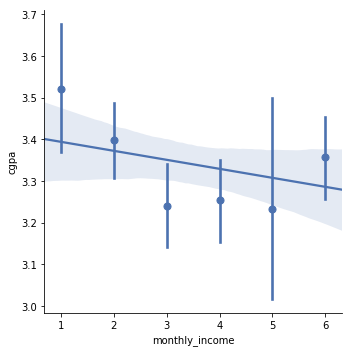

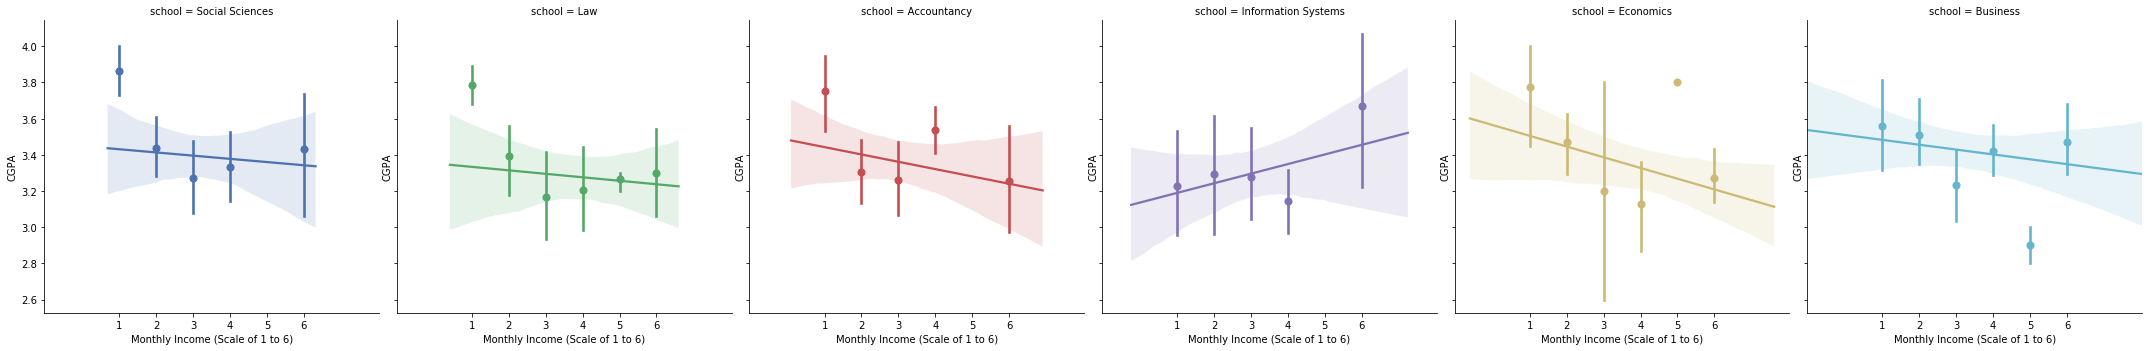

In [9]:
# Use dummy variables to make a scale of 1 - 6 for monthly_income
dfd = pd.read_csv('out_dummy.csv')

scatter = sns.lmplot(
    data=dfd,
    x="monthly_income", 
    y="cgpa", 
    x_estimator=np.mean, 
    ci=95
)

style.use('seaborn-deep')
# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval of 95
plot_mean = sns.lmplot(
    data=dfd,
    x="monthly_income", 
    y="cgpa", 
    x_estimator=np.mean, 
    ci=95,
    col='school',
    hue='school'
)
# plot_mean = sns.jointplot(x="monthly_income", y="cgpa", data=dfd, kind="reg", x_estimator=np.mean)
plot_mean.set(
#     title='For all schools in SMU', 
    xlabel='Monthly Income (Scale of 1 to 6)', 
    ylabel='CGPA',
    xticks=range(1, 7)
)

In [10]:
# school = dfd['school']
# IS = dfd[school == 'Information Systems']
# ACC = dfd[school == 'Accountancy']
# LAW = dfd[school == 'Law']
# BIZ = dfd[school == 'Business']
# ECN = dfd[school == 'Economics']
# SOC = dfd[school == 'Social Sciences']

# school_lst = [
#     (IS, "Information Systems"), 
#     (ACC, "Accountancy"), 
#     (LAW, "Law"), 
#     (BIZ, "Business"), 
#     (ECN, "Economics"), 
#     (SOC, "Social Sciences")
# ]


# for tup in school_lst:
#     plot_mean = sns.lmplot(x="monthly_income", y="cgpa", data=tup[0], x_estimator=np.mean, ci=95)
#     plot_mean.set(title=tup[1], xlabel='Monthly Income (Scale of 1 to 6)', ylabel='CGPA')

In [11]:
income = [int(i) for i in list(dfd['monthly_income'])]
gpa = [float(i) for i in list(dfd['cgpa'])]

with open("linreg_dummy.txt", "w+") as f:
    f.write(str(scipy.stats.linregress(income, gpa)))
    
print(scipy.stats.linregress(income, gpa))

mod_dummy = ols('cgpa ~ monthly_income', data=dfd).fit() 

with open('Ordinary Least Squares regression_dummy.txt', 'w+') as file:
    file.write(str(mod_dummy.summary())) 
    
print(str(mod_dummy.summary()))

LinregressResult(slope=-0.021572000942729173, intercept=3.415384063948464, rvalue=-0.09224787609390826, pvalue=0.13493336211114884, stderr=0.014385589073234102)
                            OLS Regression Results                            
Dep. Variable:                   cgpa   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.249
Date:                Thu, 08 Nov 2018   Prob (F-statistic):              0.135
Time:                        11:02:24   Log-Likelihood:                -131.41
No. Observations:                 264   AIC:                             266.8
Df Residuals:                     262   BIC:                             274.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t  

In [12]:
## Stuff that didn't work

# One-way ANOVA
# n = grouped.size()[0]
# N = len(df.values)
# k = len(pd.unique(df.group)) # WHY DOESN'T THIS WORK?!

# SSbetween = (sum(df.groupby('mthly-income').sum()['cgpa']**2)/n) - (df['cgpa'].sum()**2)/N
# print(SSbetween)

# sum_y_squared = sum([value**2 for value in df['cgpa'].values])
# SSwithin = sum_y_squared - sum(df.groupby('mthly-income').sum()['cgpa']**2)/n
# print(SSwithin)


# SStotal = sum_y_squared - (df['cgpa'].sum()**2)/N
# print(SStotal)

# DFbetween = k - 1
# DFwithin = N - k
# DFtotal = N - 1



# too lengthy
# def polyfit(x, y, degree):
#     results = {}

#     coeffs = np.polyfit(x, y, degree)

#      # Polynomial Coefficients
#     results['polynomial'] = coeffs.tolist()

#     # r-squared
#     p = np.poly1d(coeffs)
    
#     # Fit values and mean
#     yhat = p(x)                      # or [p(z) for z in x]
#     ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
#     ssreg = np.sum((yhat-ybar)**2)   # or sum([(yihat - ybar)**2 for yihat in yhat])
#     sstot = np.sum((y - ybar)**2)    # or sum([(yi - ybar)**2 for yi in y])
#     results['determination'] = (ssreg / sstot)
#     results['correlation'] = (ssreg / sstot)**(0.5)

#     return results
# print(polyfit(income, gpa, 1))



# not useful for this case
# # Scatter plot
# scatter_plot = sns.catplot(x="monthly_income", y="cgpa", hue='school', order=order, data=df)
# scatter_plot.set(xlabel='Monthly Income (In SGD)', ylabel='CGPA')
# scatter_plot = scatter_plot.fig.autofmt_xdate()
# plt.show()